In [1]:
import pprint
import numpy as np
import seaborn as sns

from utils import Utils
from pipeline import HsiPipeline
from hsiroutine import HsiRoutine
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:
folder = '/Users/Usuario/documento_pipe/HyperSI/Plastico B'
samples_dict = Utils.get_dict(samples=Utils.load_samples(folder))

pprint.pprint(samples_dict)

{'Enterococcusfaecalis_29212_Plastico_B_180926-093958': [1],
 'Klebsielapneumonial_700603_Plastico_B_180926-105913': [2],
 'Micrococcusluteus_9341_Plastico_B_180926-093534': [3],
 'Pseudomonasaeoruginosas_9027_Plastico_B_180926-104046': [4],
 'Salmonellaspp_10708_Plastico_B_180926-104803': [5],
 'Serratiamarcences_14765_Plastico_B_180926-105123': [6]}


In [3]:
samples_dict = {
#  'Bacillusscereus_14579_Plastico_B_180926-092335': [1, 1],
#  'Bacillussubtilis_6633_Plastico_B_180926-092656': [2, 1],
#  'Coryniumbacteriumglutaminum_13032_Plastico_B_180926-093210': [3, 1],
#  'Enterobacteaerogenes_13048_Plastico_B_Contaminado_180926-102747': [1, 2],
 'Enterococcusfaecalis_29212_Plastico_B_180926-093958': [2, 1],
 'Klebsielapneumonial_700603_Plastico_B_180926-105913': [3, 2],
 'Micrococcusluteus_9341_Plastico_B_180926-093534': [4, 1],
 'Pseudomonasaeoruginosas_9027_Plastico_B_180926-104046': [5, 2],
 'Salmonellaspp_10708_Plastico_B_180926-104803': [6, 2],
 'Serratiamarcences_14765_Plastico_B_180926-105123': [7, 2],
    }

# samples_dict = {'Bacillusscereus_14579_Plastico_B_180926-092335': [1, 1],
#  'Coryniumbacteriumglutaminum_13032_Plastico_B_180926-093210': [2, 1],
#  'Enterobacteaerogenes_13048_Plastico_B_Contaminado_180926-102747': [3, 2],
#  'Enterococcusfaecalis_29212_Plastico_B_180926-093958': [4, 1],
#  'Klebsielapneumonial_700603_Plastico_B_180926-105913': [5, 2],
#  'Micrococcusluteus_9341_Plastico_B_180926-093534': [6, 1],
#  'Pseudomonasaeoruginosas_9027_Plastico_B_180926-104046': [7, 2],
#  'Salmonellaspp_10708_Plastico_B_180926-104803': [8, 2],
#  'Serratiamarcences_14765_Plastico_B_180926-105123': [9, 2],
                
# }

In [4]:
true_labels = {'gram_positiva': 1, 'gram_negativa': 2}
pipeline = HsiPipeline(data_folder=folder, samples=samples_dict)


In [8]:
pipeline.process_images()

In [5]:
# pipeline.folder
# pipeline.samples

### Análise de Componentes Principais (PCA)

<br>

<div style="text-aling: justify">
    A PCA é uma técnica da estatística multivariada que consiste em transformar um conjunto de variáveis originais em outro
    conjunto de variáveis de mesma dimensão denominadas de componentes principais. Os componentes principais apresentam
    propriedades importantes: cada componente principal é uma combinação linear de todas as variáveis originais, são
    independentes entre si e estimados com o propósito de reter, em ordem de estimação, o máximo de informação, em termos da
    variação total contida nos dados
</div>

<br>

<div style="text-aling: justify">
    O objetivo principal da análise de componentes principais é o de explicar a estrutura da variância e covariância de um
    vetor aleatório, composto de p-variáveis aleatórias, por meio de combinações lineares das variáveis originais. Essas
    combinações lineares são chamadas de componentes principais e são não correlacionadas entre si 
</div>

<br>

<div style="text-aling: justify"> 
    Pode ser utilizada para geração de índices e agrupamento de indivíduos. A análise agrupa os indivíduos
    de acordo com sua variação, isto é, os indivíduos são agrupados segundo suas variâncias, ou seja, segundo seu
    comportamento dentro da população, representado pela variação do conjunto de características que 
    define o indivíduo, ou seja, a técnica agrupa os indivíduos de uma população segundo a variação de suas
    características. 
</div>

<br>

<div style="text-aling: justify"> 
    Sejam as variáveis X1, X2, . . ., Xpem cada um de n indivíduos ou unidades
    experimentais. Este conjunto de n × p medidas origina uma matriz de dados X (n × p):
</div>

<br>

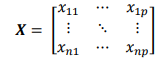

<div style="text-aling: justify">
    É possível representar o conjunto de dados Xn,p da maneira como descrita na Equação abaixo, 
    onde X são as amostras originais conforme matriz acima, T é a matriz de scores e L é a matriz de loadings.
</div>

<br>

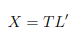

<br>

<div style="text-aling: justify">
    Para obter as CPs, primeiro é necessário calcular a matriz de variância-covariância Σ, 
    encontrar os seus autovalores e autovetores respectivamente e, por fim, por meio de 
    combinações lineares, obter as CPs que serão usadas pra representar o conjunto de dados. 
    A matriz de variância-covariância pode ser descrita como: 
</div>
<br>

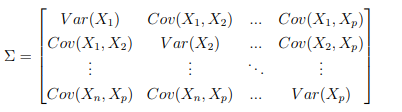

<br>
<div style="text-aling: justify">
    Para qual e Var(Xi) e Cov(Xi, Xj) são definidas por: 
</div>
<br>

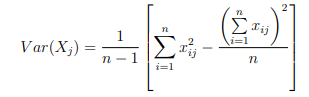

<br>

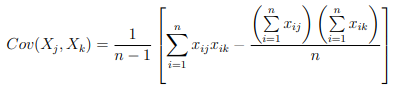

<br>
<div style="text-aling: justify">
    A partir da matriz de variância-covariância Σ encontram-se os autovalores e autovetores 
    ao qual o fator de importância de um autovalor segue de forma decrescente. Logo,
    a i-ésima componente principal pode ser obtida através da combinação linear entre os 
    dados originais e os elementos dos autovetores calculados a partir da matriz Σ.
</div>

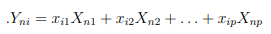

<br>

<div>
    A variabilidade total contida nas CPs é igual a variabilidade total contida nas
    variáveis originais. A contribuição da k-ésima CP, representada em porcentagem,por
</div>

<br>

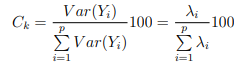

In [7]:
pca_matrix, var_exp, target_groups = pipeline.get_pca_matrix(case=0, 
                                                             true_labels=true_labels, 
                                                             mean=True)

[ 2.11738641  2.06046722  1.97291519  1.85040294  1.68765367  1.48780027
  1.25398166  0.97802657  0.66457514  0.31442902  0.29038501  0.2666088
  0.24433519  0.23423061  0.22036258  0.20531729  0.18799247  0.18422309
  0.17686246  0.17704132  0.1708174   0.16059258  0.14100495  0.12609499
  0.11446229  0.10077778  0.08967815  0.08810017  0.07279199  0.05107225
  0.02943042 -0.00705918 -0.04756721 -0.08610522 -0.12765938 -0.17418452
 -0.21214447 -0.25104426 -0.28333026 -0.31287511 -0.32589154 -0.33857565
 -0.35238588 -0.35983517 -0.36509448 -0.36072557 -0.34795722 -0.32666059
 -0.29449043 -0.27311545 -0.25465824 -0.2302195  -0.22213694 -0.21297902
 -0.20690419 -0.20317113 -0.20129788 -0.19584759 -0.1908412  -0.17962392
 -0.17760266 -0.15601905 -0.13453708 -0.11827919 -0.09356756 -0.06875727
 -0.03915477 -0.0054282   0.02914522  0.06001475  0.08207632  0.10318897
  0.12418523  0.13531885  0.14647917  0.16183145  0.17629989  0.18301334
  0.19384518  0.20772105  0.22405523  0.22993631  0.

[ 2.11502787  2.04950069  1.94467321  1.80489595  1.62380995  1.4056347
  1.150164    0.85856187  0.53199291  0.16322123  0.13459149  0.1120613
  0.09251823  0.07882054  0.06932529  0.06204007  0.0523404   0.05003842
  0.05022883  0.04515947  0.04191853  0.04061458  0.03697785  0.03087603
  0.02664851  0.02161843  0.01367691  0.00289198 -0.00959934 -0.03306406
 -0.07075221 -0.11780173 -0.17228848 -0.22832285 -0.28199022 -0.33652807
 -0.38129967 -0.4326333  -0.47014075 -0.50144591 -0.52148514 -0.53185921
 -0.53604939 -0.52615212 -0.50548215 -0.47543862 -0.43118654 -0.37857877
 -0.32034905 -0.26077656 -0.20813607 -0.15995987 -0.1194126  -0.08953215
 -0.06115911 -0.03350221 -0.00788666  0.02310718  0.04601322  0.07651029
  0.10962376  0.14631588  0.1837218   0.21581011  0.25585683  0.300561
  0.34587152  0.39099685  0.43740378  0.48205567  0.51578226  0.54835006
  0.57692266  0.60782868  0.62849149  0.65037913  0.67011324  0.68152256
  0.6891378   0.69925904  0.70528616  0.70563005  0.696

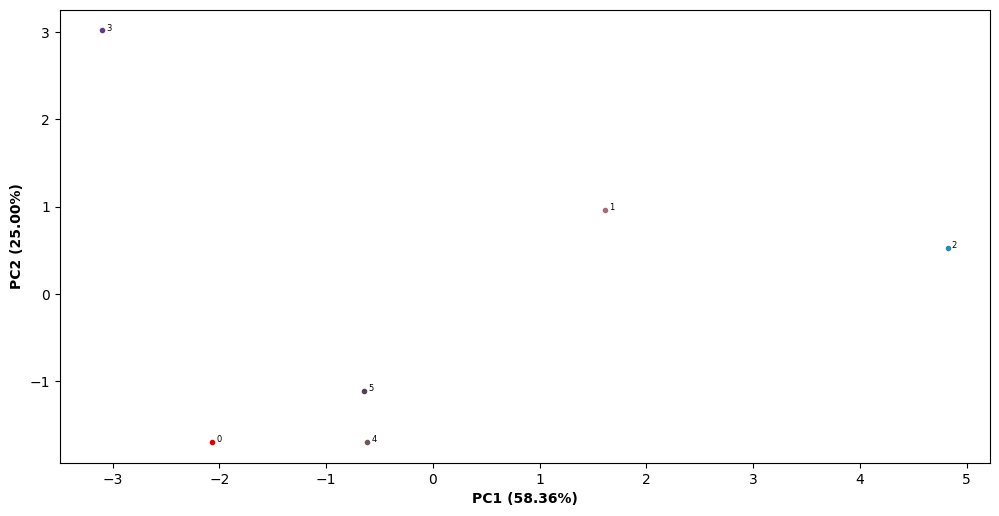

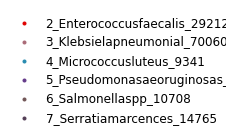

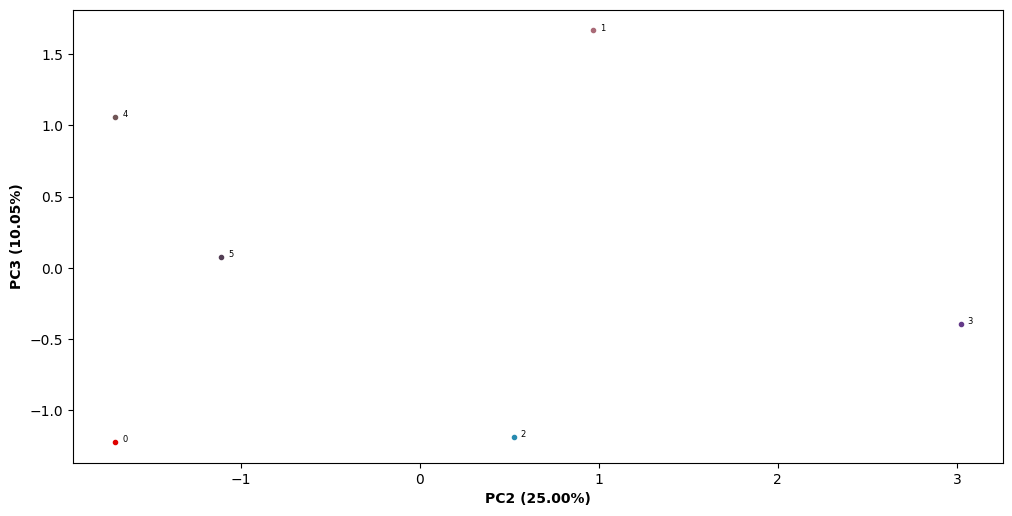

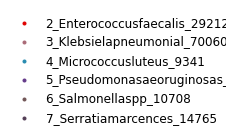

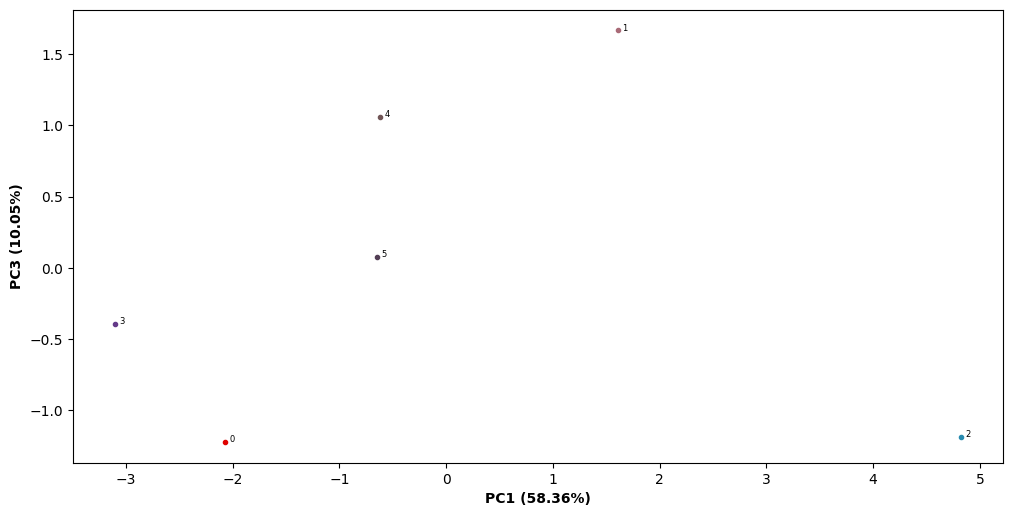

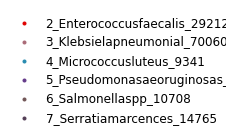

In [8]:
pipeline.plot_pca_samples(pca_matrix_groups=pca_matrix, 
                          exp_var_groups=var_exp, 
                          true_labels=target_groups, 
                          out_dir='figures_plot')

### Imagem Hiperespectral (HSI)

<br>

<ul>
    <li>
        A HSI é a fusão da espectroscopia e da análise de imagens, ou imagens hiperespectrais
        e pode ser usada para visualizar a distribuição espacial dos compostos químicos em uma amostra, 
        fornecendo imagem química. Cada medida da amostra gera um cubo de dados em mais de 100 canais 
        espectrais ou comprimentos de onda, contendo milhares de espectros. Uma parte importante de uma 
        análise NIR-CI é o processamento dos dados a partir dos hipercubos.
    </li>
    <li>
        As câmeras hiperespectrais geram imagens de 256 pixels x 320 pixels com n bandas de 
        comprimento de onda. (Geladi et al., 2004).
    </li>
    <li style="text-align: justify">
    Uma HSI é composta por λ imagens bidimensionais construídas a partir dos
    valores medidos em um determinando comprimento de onda. As bandas espectrais em
    uma HSI são contínuas. Essa característica permite a HSI fornecer centenas de bandas
    de dados com alta resolução espacial e espectral.
    </li>
</ul>
<br>

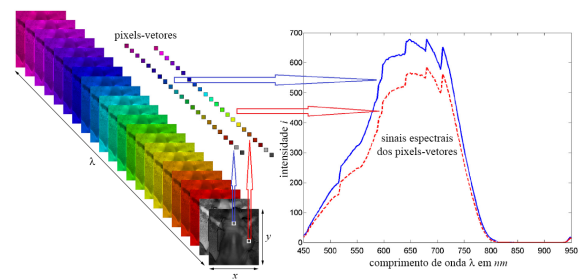

<br>

<ul>
    <li style="text-align: justify">
        O conjunto de quadros em forma sequencial representam o hipercubo. Cada quadro corresponde a 
        imagem bidimensional de um comprimento de onda especifico dentro da faixa espectral do 
        hipercubo. As setas verticais indicam dois conjuntos distintos de pixels selecionados a 
        partir de uma mesma referencia espacial em todas as imagens. 
    </li>
    <li>
        Cada conjunto compõe o 
        que denomina-se pixel-vetor. As setas horizontais indicam as representações espectrais 
        de dois pixels-vetores da HSI no plano cartesiano, onde o eixo λ corresponde aos 
        comprimentos de onda da HSI e o eixo i corresponde a intensidade de luz medida
    </li>
</ul>


In [27]:
mean_group_gram,target = pipeline.get_group_mean_matrix(case=0, true_labels=true_labels)

[ 2.11738641  2.06046722  1.97291519  1.85040294  1.68765367  1.48780027
  1.25398166  0.97802657  0.66457514  0.31442902  0.29038501  0.2666088
  0.24433519  0.23423061  0.22036258  0.20531729  0.18799247  0.18422309
  0.17686246  0.17704132  0.1708174   0.16059258  0.14100495  0.12609499
  0.11446229  0.10077778  0.08967815  0.08810017  0.07279199  0.05107225
  0.02943042 -0.00705918 -0.04756721 -0.08610522 -0.12765938 -0.17418452
 -0.21214447 -0.25104426 -0.28333026 -0.31287511 -0.32589154 -0.33857565
 -0.35238588 -0.35983517 -0.36509448 -0.36072557 -0.34795722 -0.32666059
 -0.29449043 -0.27311545 -0.25465824 -0.2302195  -0.22213694 -0.21297902
 -0.20690419 -0.20317113 -0.20129788 -0.19584759 -0.1908412  -0.17962392
 -0.17760266 -0.15601905 -0.13453708 -0.11827919 -0.09356756 -0.06875727
 -0.03915477 -0.0054282   0.02914522  0.06001475  0.08207632  0.10318897
  0.12418523  0.13531885  0.14647917  0.16183145  0.17629989  0.18301334
  0.19384518  0.20772105  0.22405523  0.22993631  0.

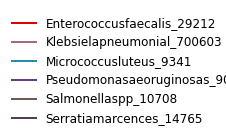

In [28]:
pipeline.plot_spectres(mean_group=mean_group_gram, 
                       true_labels=target, 
                       out_dir='figures_plot',
                       file_name='mean_spectres.jpeg')

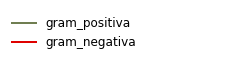

In [12]:
pipeline.plot_spectres(mean_group=mean_group_gram, 
                       true_labels=target, 
                       out_dir='figures_plot',
                       file_name='sample_spectres.jpeg')